# Apreensão de Drogas no Centro de Tratamento de Encomendas dos Correios - Recife

## Contexto do Caso

Em **março de 2025**, cerca de **R$ 300 mil em drogas** foram apreendidas no **Centro de Tratamento de Encomendas dos Correios**, localizado em Recife. As substâncias ilícitas, provenientes de **São Paulo** e destinadas a **cidades do interior do Nordeste**, estavam disfarçadas em pacotes comuns, como **brinquedos** e **almofadas**, para evitar a detecção.

### **Implicações do Caso:**
- **Rota do tráfico interestadual e regional**: Recife se revela como um ponto estratégico de trânsito e redistribuição no **tráfico de drogas**, operando como **elo importante** entre os estados de **São Paulo** e as **cidades do interior nordestino**.
- **Sofisticação das organizações criminosas**: O modo como as drogas foram disfarçadas em encomendas comuns mostra a **sofisticação** das redes de tráfico, que têm a capacidade de **explorar vulnerabilidades no sistema de transporte** para movimentar grandes quantidades de substâncias ilícitas.
- **Uso de estruturas públicas para atividades ilegais**: O fato de os **Correios**, uma **instituição pública**, estarem sendo utilizados para o tráfico evidencia o **risco de infiltração de atividades criminosas** em setores fundamentais da sociedade.
- **Aumento do risco de violência e consumo de drogas**: A apreensão não só destaca a atuação do tráfico de drogas em Recife, mas também **potencializa o risco de **aumento da violência urbana** e do **consumo de substâncias ilícitas**, afetando diretamente a segurança e a qualidade de vida da população.

---

## Considerações Finais

Esse episódio serve como um alerta sobre as **rotas do tráfico** que envolvem **grandes centros urbanos** como Recife e a **sofisticação crescente das organizações criminosas**, que são capazes de explorar lacunas no sistema de **entregas** e **transporte**. Além disso, demonstra a necessidade de **estratégias mais robustas de fiscalização** e **integração entre as autoridades** para combater o tráfico de drogas e garantir a segurança pública.

**Fonte**: Sindireceita – RFB apreende cerca de R$ 300 mil em drogas no Recife/PE. Publicado em 19 de março de 2025. Acesso em: [https://www.sindireceita.org.br](https://www.sindireceita.org.br)


# Por que Combater o Tráfico de Drogas no Recife é Fundamental?

## 1. Redução da Violência Urbana

O tráfico de drogas está **diretamente ligado à violência urbana**. Ele é um dos principais responsáveis por **homicídios**, **disputas entre facções**, **roubos** e outros **crimes violentos**. A relação entre **consumo e tráfico de drogas** e comportamentos **violentos ou agressivos** é amplamente reconhecida em estudos acadêmicos. 

De acordo com **Lélio Moura Lourenço**, **Gabriel Resgala Silva**, **Thiago Pavin Rodrigues** e **Diego Pedrosa Carvalho** (2007), existe uma forte conexão entre o consumo de drogas, o tráfico e a **agressividade** que, muitas vezes, se traduz em **ações violentas**.

> Lourenço, L. M., Silva, G. R., Rodrigues, T. P., & Carvalho, D. P. (2007).  
> Um estudo das crenças no que concerne ao consumo/tráfico de drogas enquanto causa da violência/agressividade. *Revista Psicologia em Pesquisa*, 1(1), 59–70.  
> [Link para o artigo completo](https://periodicos.ufjf.br/index.php/psicologiaempesquisa/article/view/23705)

### Implicações:
- **Maior controle e repressão ao tráfico** significaria a **redução de confrontos violentos** e a diminuição da **criminalidade organizada** no Recife.
- **Estabilidade social** poderia ser restaurada, com **menor violência nas ruas** e maior sensação de segurança para a população.

---

## 2. Proteção da Saúde Mental e Física da População

O aumento da disponibilidade de drogas ilícitas resulta em **uso abusivo**, principalmente entre **jovens** e **pessoas vulneráveis**, levando a:

- **Dependência química**: O vício em substâncias ilícitas compromete a vida de milhões de pessoas e suas famílias.
- **Problemas de saúde mental**: O uso excessivo de drogas está relacionado a transtornos como **ansiedade**, **depressão** e **psicose**, afetando a qualidade de vida dos indivíduos.
- **Comportamentos agressivos ou autodestrutivos**: O consumo de drogas pode desencadear atitudes impulsivas e violentas, com sérios impactos na vida social e familiar.

Estudos indicam que os transtornos causados pelo uso de substâncias ilícitas resultam em **mortes prematuras** e **incapacidades significativas**. Estima-se que mais de **meio milhão de mortes** e **milhões de anos de vida saudável perdidos (DALY)** sejam atribuídos a essas doenças.

### Impacto Ambiental:
Além das consequências para a saúde pública, o tráfico de drogas também **afeta o meio ambiente**:

- O **cultivo** e o **processamento de drogas ilícitas** resultam em **desmatamento**, **uso de terras frágeis**, **poluição do solo, água e ar**.
- **Laboratórios clandestinos** geram **resíduos tóxicos** que, muitas vezes, são descartados de maneira inadequada, causando danos ambientais e gerando **custos altos para a limpeza e restauração do ecossistema**.

### Fontes:
- **UNODC – United Nations Office on Drugs and Crime**, *Relatório Mundial sobre Drogas 2025*: O relatório destaca que a **instabilidade global** agrava os **custos sociais, econômicos e de segurança** associados ao tráfico de drogas.  
  [Leia o relatório completo aqui](https://www.unodc.org/cofrb/pt/noticias/2025/6/relatorio-mundial-sobre-drogas-2025-do-unodc_-instabilidade-global-agrava-custos-sociais--economicos-e-de-seguranca-do-problema-mundial-das-drogas.html)

---

## Conclusão

Combater o tráfico de drogas no Recife é essencial não apenas para **reduzir a violência urbana**, mas também para **proteger a saúde pública e mental** da população, **minimizar danos ambientais** e combater o avanço de práticas criminosas que afetam diretamente a segurança e o bem-estar da comunidade. A ação eficaz contra o tráfico pode resultar em uma **cidade mais segura**, com **menos violência**, **menor uso de substâncias** e **melhores condições de vida para os cidadãos**.



Com base nesses dados, é possível identificar quais bairros do Recife têm maior propensão ao tráfico de drogas em determinados períodos. O objetivo dessa análise é prever as áreas com maior risco para orientar ações estratégicas e políticas públicas eficazes, visando à redução significativa do tráfico de drogas na cidade.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("../data/raw/dataset_ocorrencias_delegacia_5.csv")
df.head(10)

,id_ocorrencia,data_ocorrencia,bairro,tipo_crime,descricao_modus_operandi,arma_utilizada,quantidade_vitimas,quantidade_suspeitos,sexo_suspeito,idade_suspeito,orgao_responsavel,status_investigacao,latitude,longitude
0,OCR100000,2024-08-02 19:48:16.958668,Imbiribeira,Sequestro,Golpe Telefônico,Faca,2,0,Não Informado,53,Delegacia Casa Forte,Concluído,-8.111355,-34.943524
1,OCR100001,2022-10-29 19:48:16.958694,Boa Viagem,Homicídio,Fraude Online,Objeto Contundente,4,1,Não Informado,29,Delegacia Casa Forte,Arquivado,-8.082012,-34.861911
2,OCR100002,2023-03-12 19:48:16.958698,Santo Amaro,Furto,Invasão Residencial,Nenhum,1,4,Feminino,65,Delegacia Casa Forte,Arquivado,-8.096916,-34.898378
3,OCR100003,2025-04-18 19:48:16.958700,Afogados,Roubo,Arrombamento,Nenhum,1,4,Não Informado,30,Delegacia Torre,Concluído,-8.135066,-34.913460
4,OCR100004,2025-06-30 19:48:16.958702,Tamarineira,Roubo,Estupro Coletivo,Arma de Fogo,3,3,Masculino,20,Delegacia Casa Forte,Concluído,-8.074124,-34.933504
5,OCR100005,2024-04-19 19:48:16.958705,Torre,Ameaça,Estupro Coletivo,Nenhum,0,1,Não Informado,32,Delegacia Pina,Em Investigação,-8.073443,-34.872966
6,OCR100006,2022-11-28 19:48:16.958708,Tamarineira,Homicídio,Estelionato Bancário,Explosivos,0,4,Feminino,28,Delegacia Boa Viagem,Em Investigação,-8.082291,-34.916104
7,OCR100007,2024-11-10 19:48:16.958710,Boa Viagem,Sequestro,Estelionato Bancário,Explosivos,1,2,Não Informado,24,Delegacia Pina,Arquivado,-8.090553,-34.853023
8,OCR100008,2025-01-13 19:48:16.958717,Tamarineira,Latrocínio,Golpe Telefônico,Faca,3,2,Não Informado,14,Delegacia Afogados,Arquivado,-8.084152,-34.886466
9,OCR100009,2025-01-25 19:48:16.958720,Torre,Tráfico de Drogas,Emboscada,Explosivos,3,3,Feminino,23,Delegacia Boa Viagem,Em Investigação,-8.086795,-34.871654


In [4]:
df.duplicated().sum()


0

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id_ocorrencia             5000 non-null   object 
 1   data_ocorrencia           5000 non-null   object 
 2   bairro                    5000 non-null   object 
 3   tipo_crime                5000 non-null   object 
 4   descricao_modus_operandi  5000 non-null   object 
 5   arma_utilizada            5000 non-null   object 
 6   quantidade_vitimas        5000 non-null   int64  
 7   quantidade_suspeitos      5000 non-null   int64  
 8   sexo_suspeito             5000 non-null   object 
 9   idade_suspeito            5000 non-null   int64  
 10  orgao_responsavel         5000 non-null   object 
 11  status_investigacao       5000 non-null   object 
 12  latitude                  5000 non-null   float64
 13  longitude                 5000 non-null   float64
dtypes: float

Não tem nenhum dado nulo.

In [6]:
df.describe()

,quantidade_vitimas,quantidade_suspeitos,idade_suspeito,latitude,longitude
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,1.986800,2.024400,41.506600,-8.100483,-34.900292
std,1.408908,1.423309,16.135998,0.028747,0.029133
min,0.000000,0.000000,14.000000,-8.149999,-34.949994
25%,1.000000,1.000000,28.000000,-8.124929,-34.925741
50%,2.000000,2.000000,41.000000,-8.100711,-34.900667
75%,3.000000,3.000000,55.000000,-8.075966,-34.875063
max,4.000000,4.000000,69.000000,-8.050003,-34.850032


Apagar colunas que não vão ser relevantes para a minha análise 

In [6]:
df = df.drop(columns=["id_ocorrencia", "latitude", "longitude", "status_investigacao" ])
df.head()


,data_ocorrencia,bairro,tipo_crime,descricao_modus_operandi,arma_utilizada,quantidade_vitimas,quantidade_suspeitos,sexo_suspeito,idade_suspeito,orgao_responsavel
0,2024-08-02 19:48:16.958668,Imbiribeira,Sequestro,Golpe Telefônico,Faca,2,0,Não Informado,53,Delegacia Casa Forte
1,2022-10-29 19:48:16.958694,Boa Viagem,Homicídio,Fraude Online,Objeto Contundente,4,1,Não Informado,29,Delegacia Casa Forte
2,2023-03-12 19:48:16.958698,Santo Amaro,Furto,Invasão Residencial,Nenhum,1,4,Feminino,65,Delegacia Casa Forte
3,2025-04-18 19:48:16.958700,Afogados,Roubo,Arrombamento,Nenhum,1,4,Não Informado,30,Delegacia Torre
4,2025-06-30 19:48:16.958702,Tamarineira,Roubo,Estupro Coletivo,Arma de Fogo,3,3,Masculino,20,Delegacia Casa Forte


MATRIZ DE CORRELAÇÃO

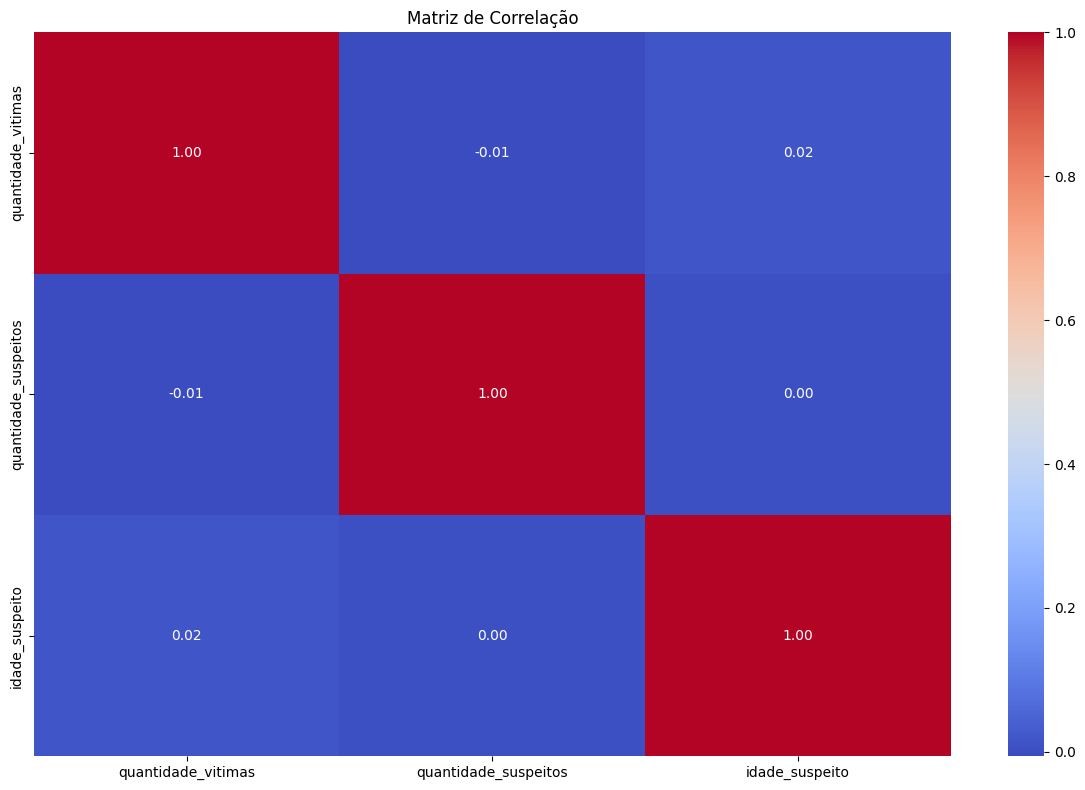

In [7]:
numericas_sem_geo = df.select_dtypes(include='number')

# Plotar a matriz de correlação
plt.figure(figsize=(12, 8))
sns.heatmap(numericas_sem_geo.corr(), annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Matriz de Correlação")
plt.tight_layout()
plt.show()

Insights da Matriz de Correlação
Principais descobertas:

Correlações fracas entre variáveis numéricas: Indica que as features são relativamente independentes, o que é positivo para modelagem
Ausência de multicolinearidade forte: Não há correlações altas (>0.8) que possam prejudicar o modelo

 histograma das variáveis Numéricas

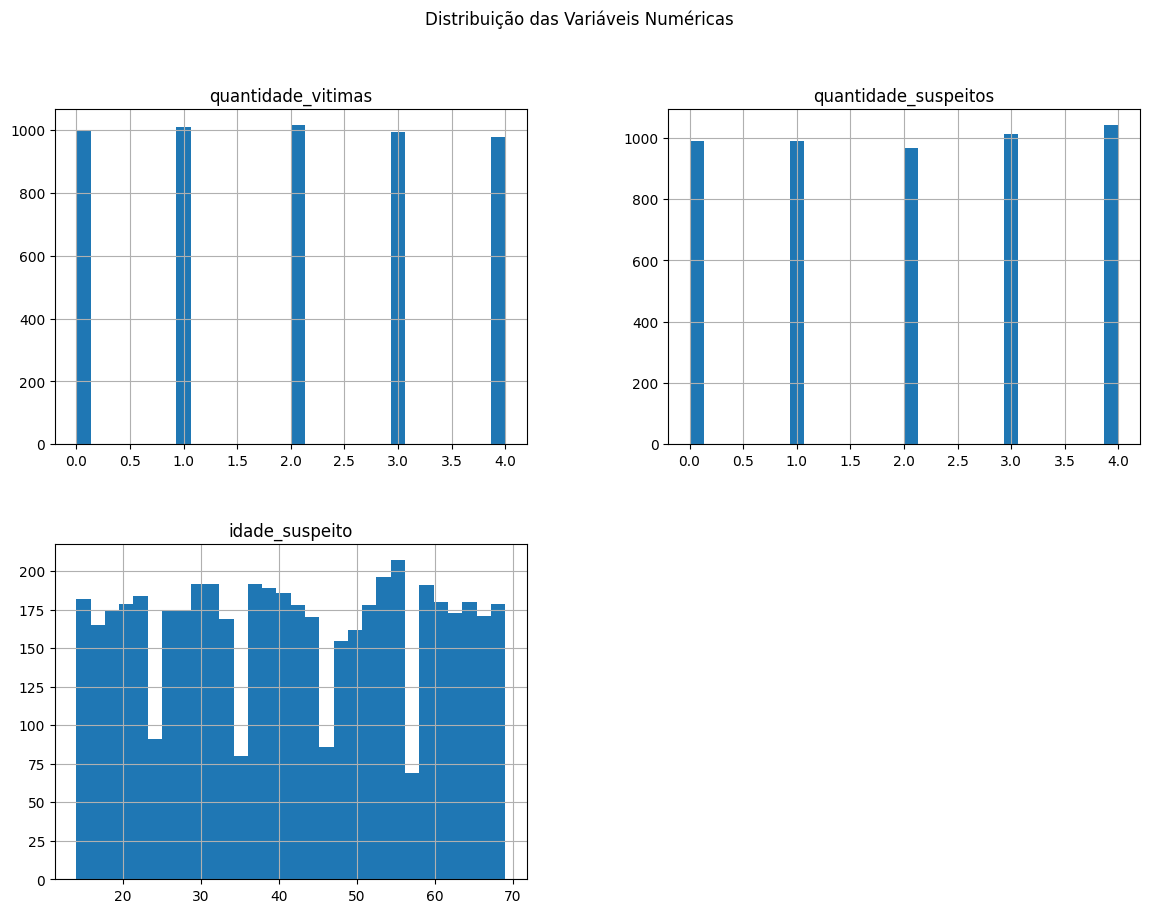

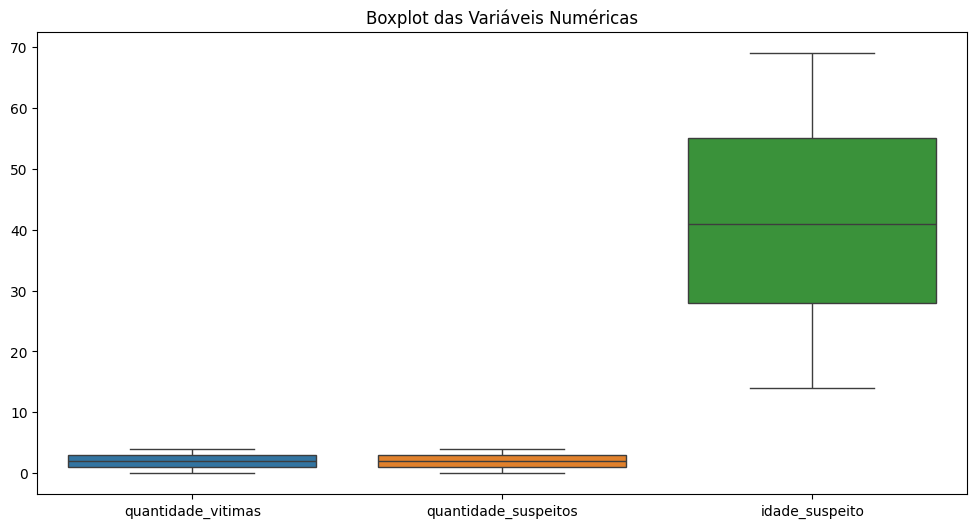

In [8]:
# Histograma
df.hist(figsize=(14,10), bins=30)
plt.suptitle("Distribuição das Variáveis Numéricas")
plt.show()

# Boxplot geral
plt.figure(figsize=(12,6))
sns.boxplot(data=df.select_dtypes(include=np.number))
plt.title("Boxplot das Variáveis Numéricas")
plt.show()


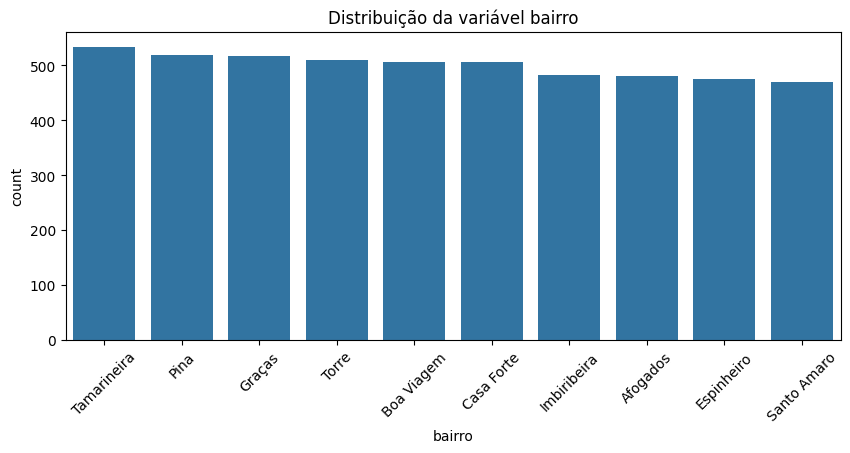

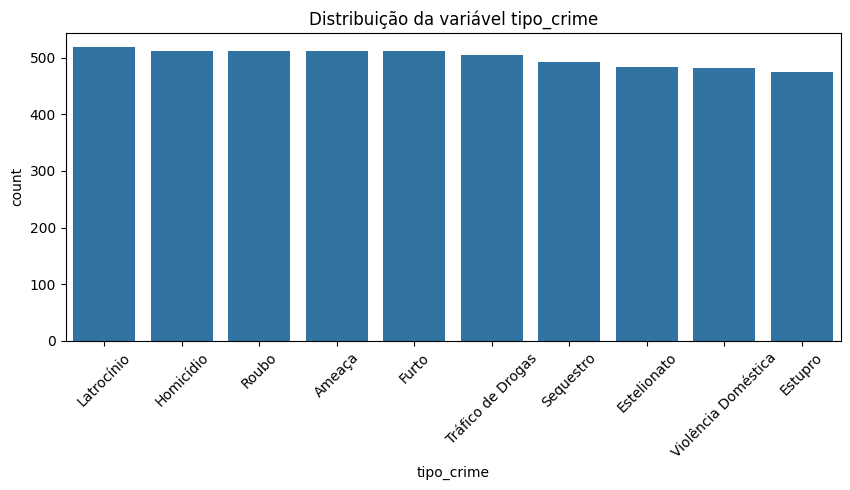

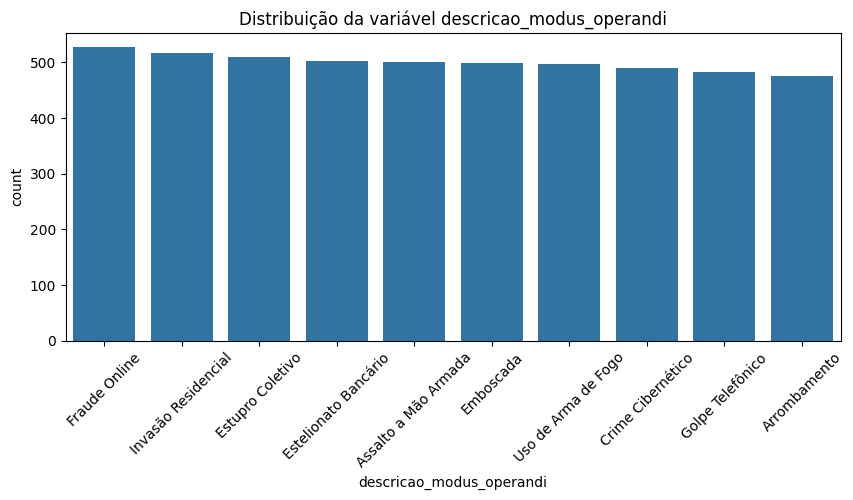

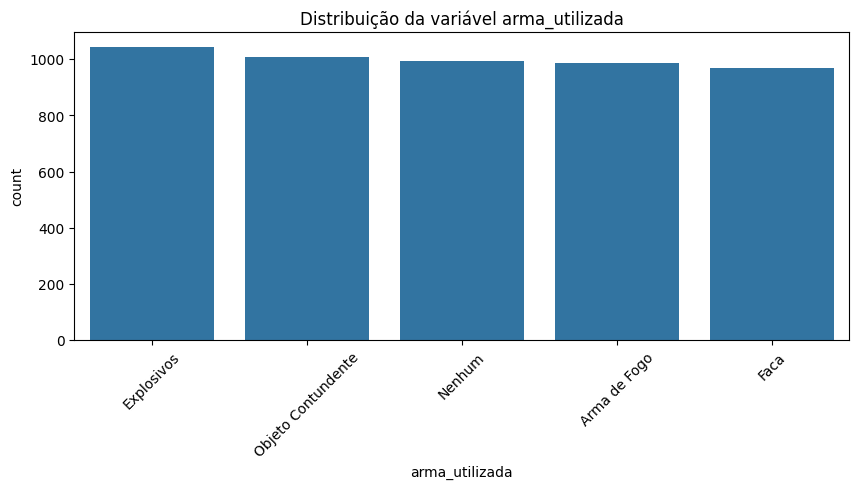

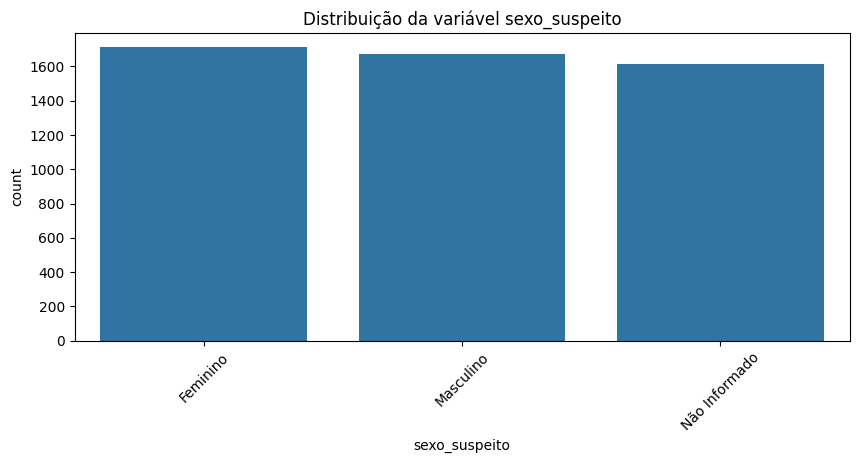

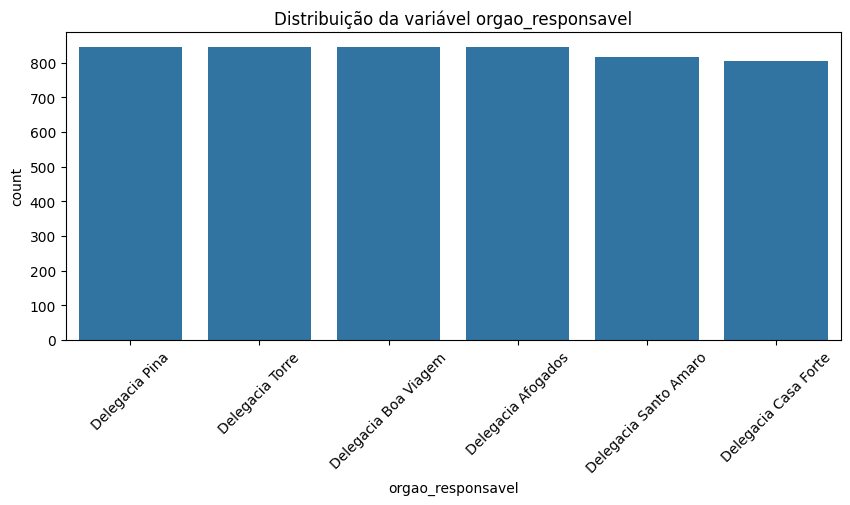

In [11]:
for col in df.select_dtypes(include="object").columns:
    if col != 'data_ocorrencia':  # Ignora essa coluna
        plt.figure(figsize=(10,4))
        sns.countplot(data=df, x=col, order=df[col].value_counts().index)
        plt.xticks(rotation=45)
        plt.title(f"Distribuição da variável {col}")
        plt.show()


# Insights das Variáveis Categóricas

## Principais Descobertas

### **Bairros:**
O bairro que registra o **maior número de casos de crimes** é **Tamarineira**. Esse bairro se destaca em relação aos outros, indicando uma possível concentração de atividades criminosas nesta área. Investigar as causas desse alto número de ocorrências pode ser importante para direcionar ações preventivas específicas.

### **Tipos de Crime:**
Alguns tipos de crime se destacam por sua **frequência**. Os crimes mais comuns são:

- **Fraude Online**
- **Invasão Residencial**

Esses crimes apresentam **altos índices de ocorrência**, o que sugere a necessidade de políticas públicas voltadas para **prevenção digital** e **segurança residencial**, além de uma **maior vigilância** nessas áreas.

### **Sexo dos Suspeitos:**
Observou-se que o **sexo feminino** é **um pouco mais predominante** que o **masculino** entre os suspeitos. Esse padrão pode sugerir um perfil de envolvimento criminoso distinto, possivelmente relacionado a **funções específicas** dentro do tráfico ou outras atividades criminosas. A diferença, embora pequena, pode ser relevante ao se considerar **estratégias de policiamento** e **prevenção**.

### **Armas Utilizadas:**
Entre as armas mais utilizadas, **há uma preferência por explosivos**. 

In [12]:
# Contar a frequência de cada tipo de crime
ranking_crimes = df['tipo_crime'].value_counts().reset_index()
ranking_crimes.columns = ['tipo_crime', 'contagem']

print(ranking_crimes)


            tipo_crime  contagem
0           Latrocínio       518
1            Homicídio       512
2                Roubo       512
3               Ameaça       512
4                Furto       511
5    Tráfico de Drogas       504
6            Sequestro       492
7          Estelionato       483
8  Violência Doméstica       482
9              Estupro       474The history saving thread hit an unexpected error (OperationalError('database or disk is full')).History will not be written to the database.



O Tráfico de drogas está em 6 lugar dos crimes mais cometidos.

ANÁLISE TEMPORAL

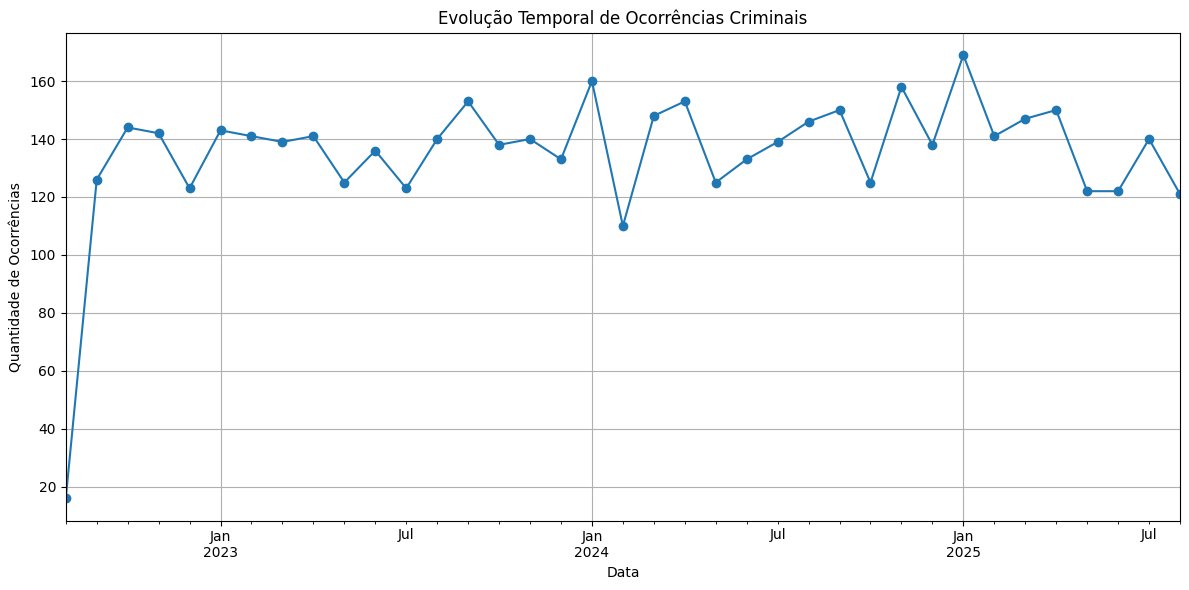

In [14]:
# Converter data
df["data_ocorrencia"] = pd.to_datetime(df["data_ocorrencia"])

# Agrupar por mês
df_time = df.groupby(df["data_ocorrencia"].dt.to_period("M")).size()


# Converter o index para datetime para melhor visualização no gráfico
df_time.index = df_time.index.to_timestamp()

# Plotar a série temporal
plt.figure(figsize=(12,6))
df_time.plot(marker='o')  # marker para visualizar os pontos
plt.title("Evolução Temporal de Ocorrências Criminais")
plt.xlabel("Data")
plt.ylabel("Quantidade de Ocorrências")
plt.grid(True)
plt.tight_layout()
plt.show()


# Insights da Análise Temporal Geral

## Principais Descobertas

### **Tendência Temporal:**
A análise da **tendência temporal** revelou os seguintes períodos de maior e menor incidência criminal:

- **Maior incidência criminal** ocorreu em **janeiro de 2025**.
- **Menor incidência criminal** foi observada em **fevereiro de 2024**.

Esses períodos representam picos e quedas significativas na criminalidade e indicam que existem **flutuações temporais** que podem ser exploradas para entender melhor os padrões de crime ao longo do tempo.

### **Sazonalidade:**
A análise também identificou **padrões sazonais**, sugerindo que a criminalidade pode ser influenciada por fatores **mensais ou sazonais**. Certos meses podem ser mais propensos a aumentos ou quedas de atividades criminosas, como, por exemplo, o aumento em janeiro, possivelmente devido a **movimentos de pessoas** durante o início do ano, ou a queda em fevereiro, que pode ser associada a **fatores sociais ou operacionais**.

### **Picos e Vales:**
Foram detectados **picos e vales** de criminalidade ao longo do tempo, com **momentos específicos** de concentração anormal de crimes (picos) e quedas inesperadas (vales). Esses **momentos críticos** podem indicar **eventos específicos** ou **mudanças nas condições sociais**, como feriados ou intensificação de políticas de segurança.

### **Evolução ao Longo do Tempo:**
A análise temporal também revelou a **evolução da criminalidade ao longo do tempo**, com tendências de:

- **Aumento** em determinados períodos, como **janeiro de 2025**.
- **Diminuição** em outros períodos, como **fevereiro de 2024**.
- **Estabilidade** em certos intervalos, sugerindo que algumas áreas ou tipos de crime podem ter um comportamento mais constante.

Filtrar por tipo de crime 

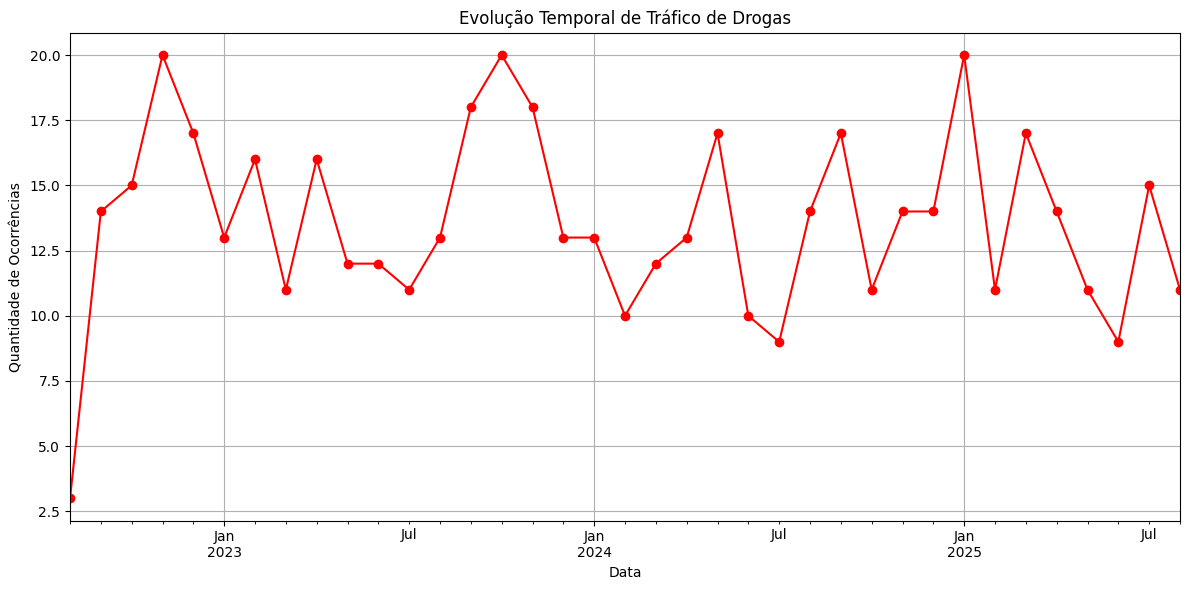

In [16]:
df_roubo = df[df["tipo_crime"] == "Tráfico de Drogas"]
df_time_roubo = df_roubo.groupby(df_roubo["data_ocorrencia"].dt.to_period("M")).size()
df_time_roubo.index = df_time_roubo.index.to_timestamp()

plt.figure(figsize=(12,6))
df_time_roubo.plot(marker='o', color='red')
plt.title("Evolução Temporal de Tráfico de Drogas")
plt.xlabel("Data")
plt.ylabel("Quantidade de Ocorrências")
plt.grid(True)
plt.tight_layout()
plt.show()


# Análise da Evolução Temporal do Tráfico de Drogas

## Picos de Ocorrências:

Observamos picos de ocorrências de **Tráfico de Drogas** nos seguintes períodos:

- Outubro de 2022
- Outubro de 2023
- Maio de 2024
- Setembro de 2024
- Janeiro de 2025
- Entre Maio e Abril de 2025

Esses picos podem indicar momentos de maior atividade relacionada ao **Tráfico de Drogas**. É interessante observar que **outubro** e **maio** se destacam por aparecerem em dois anos consecutivos, o que pode sugerir uma tendência **sazonal**. Pode ser valioso investigar mais a fundo esses meses para identificar fatores específicos que estão contribuindo para o aumento das ocorrências nesses períodos.

---

## Quedas de Ocorrências:

Por outro lado, também identificamos quedas significativas entre:

- Fevereiro e março de 2023
- Julho de 2023
- Fevereiro de 2024
- Julho de 2024
- Junho de 2025

Esses meses apresentam uma redução nas ocorrências, o que pode indicar **fatores atenuantes** ou **mudanças nos padrões de atividade criminosa** durante esses períodos. A ocorrência dessas quedas em **fevereiro**, **julho** e **junho** ao longo dos anos pode ser um padrão interessante que vale a pena explorar para entender os motivos subjacentes.

---

## Padrões Comuns:

### **Altas**: 
É notável que tanto **outubro** quanto **maio** são meses recorrentes de aumento de atividades criminosas relacionadas ao tráfico de drogas. Esse padrão sazonal pode estar relacionado a fatores como **clima**, **férias escolares**, **feriados** ou até mesmo **atividades de fiscalização e policiamento**.

### **Quedas**: 
**Fevereiro**, **junho** e **julho** também aparecem consistentemente como meses de queda. Isso pode ser influenciado por fatores sazonais como **férias**, **feriados**, ou até a ação de **políticas públicas de combate ao tráfico** que ocorrem nesses meses específicos.

---

## Questões a Serem Investigadas:

### **Por que outubro e maio apresentam picos de tráfico?**

- **Clima**: Mudanças no clima podem influenciar a dinâmica do tráfico de drogas. Verificar se esses meses coincidem com eventos climáticos específicos pode ser útil.
- **Feriados ou Eventos Específicos**: Pode ser que feriados ou festas em outubro e maio aumentem a demanda e movimentação relacionada ao tráfico.
- **Férias Escolares ou Estudantis**: Maior circulação de jovens nessas épocas pode contribuir para o aumento de crimes.

---

### **O que explica a queda em fevereiro, junho e julho?**

- **Políticas Públicas**: Existe a possibilidade de ações mais intensas por parte das autoridades de segurança nessas épocas, como **operações de combate ao tráfico** ou reforço no policiamento.
- **Mudanças nas Dinâmicas Sociais**: Certos comportamentos ou atividades criminosas podem ser influenciados por mudanças nas **rotinas de trabalho**, **educação** e **eventos culturais** que ocorrem nesses meses.
- **Fatores Econômicos ou Sazonais**: O comportamento do mercado ou a disponibilidade de substâncias pode mudar com a estação do ano, afetando a **oferta e demanda** no tráfico de drogas.


FILTAR POR BAIRRO

<Figure size 1400x700 with 0 Axes>

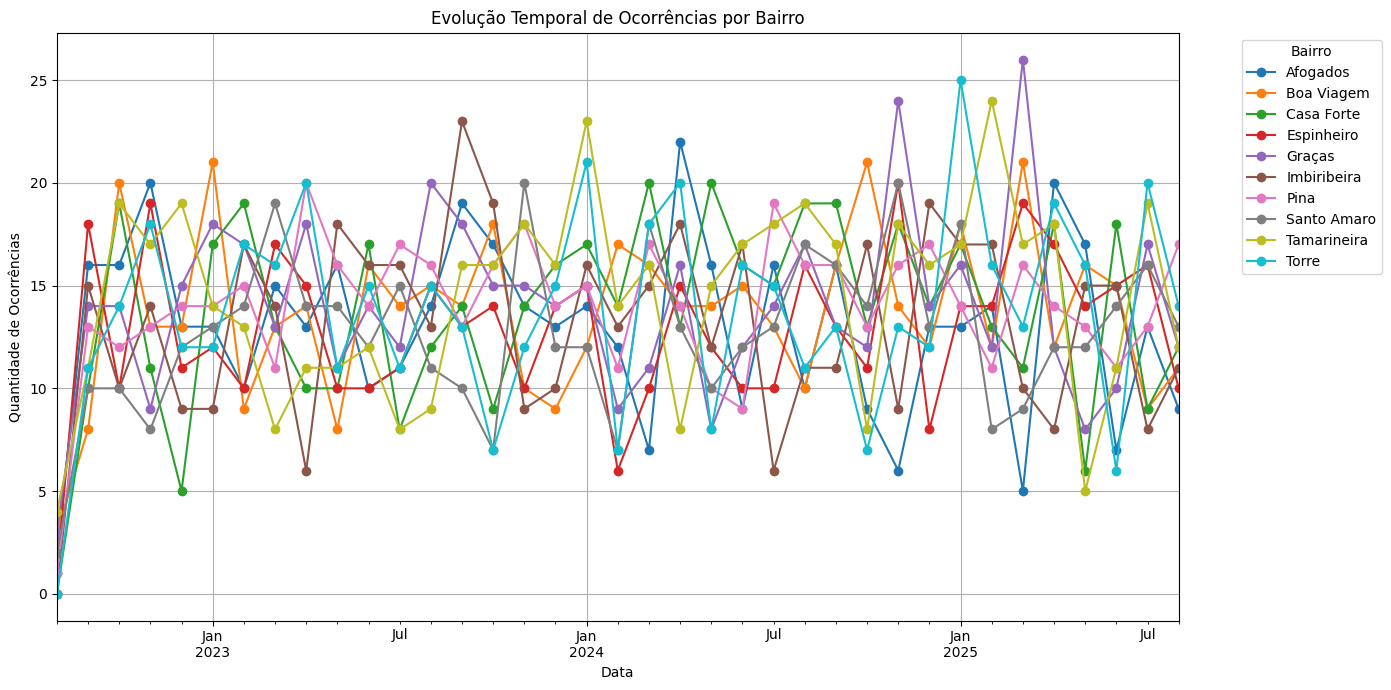

In [ ]:

import matplotlib.pyplot as plt

# Converter a data
df["data_ocorrencia"] = pd.to_datetime(df["data_ocorrencia"])

# Criar uma coluna com o mês/ano (período mensal)
df["mes_ocorrencia"] = df["data_ocorrencia"].dt.to_period("M")

# Agrupar por mês e bairro
df_grouped = df.groupby(["mes_ocorrencia", "bairro"]).size().unstack(fill_value=0)

# Converter o índice para timestamp (datetime) para melhor plot
df_grouped.index = df_grouped.index.to_timestamp()

# Plotar todas as linhas por bairro
plt.figure(figsize=(14, 7))
df_grouped.plot(marker='o', figsize=(14, 7))

plt.title("Evolução Temporal de Ocorrências por Bairro")
plt.xlabel("Data")
plt.ylabel("Quantidade de Ocorrências")
plt.grid(True)
plt.legend(title="Bairro", bbox_to_anchor=(1.05, 1), loc='upper left')  # legenda fora do gráfico
plt.tight_layout()
plt.show()


# Análise das Ocorrências de Crimes por Bairro

## Principais Descobertas

### **Bairros com Maior Número de Ocorrências:**

A análise das ocorrências de crimes revela que os bairros com o **maior número de ocorrências** são:

- **Graças**
- **Torre**

Esses bairros se destacam como **os locais com maior concentração de crimes**, indicando uma necessidade de **investigação mais aprofundada** sobre os fatores que contribuem para essa alta taxa de criminalidade nessas áreas.

C:\Users\55819\AppData\Local\Temp\ipykernel_3940\2361146637.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_trafico["data_ocorrencia"] = pd.to_datetime(df_trafico["data_ocorrencia"])
C:\Users\55819\AppData\Local\Temp\ipykernel_3940\2361146637.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_trafico["mes_ocorrencia"] = df_trafico["data_ocorrencia"].dt.to_period("M")


<Figure size 1400x700 with 0 Axes>

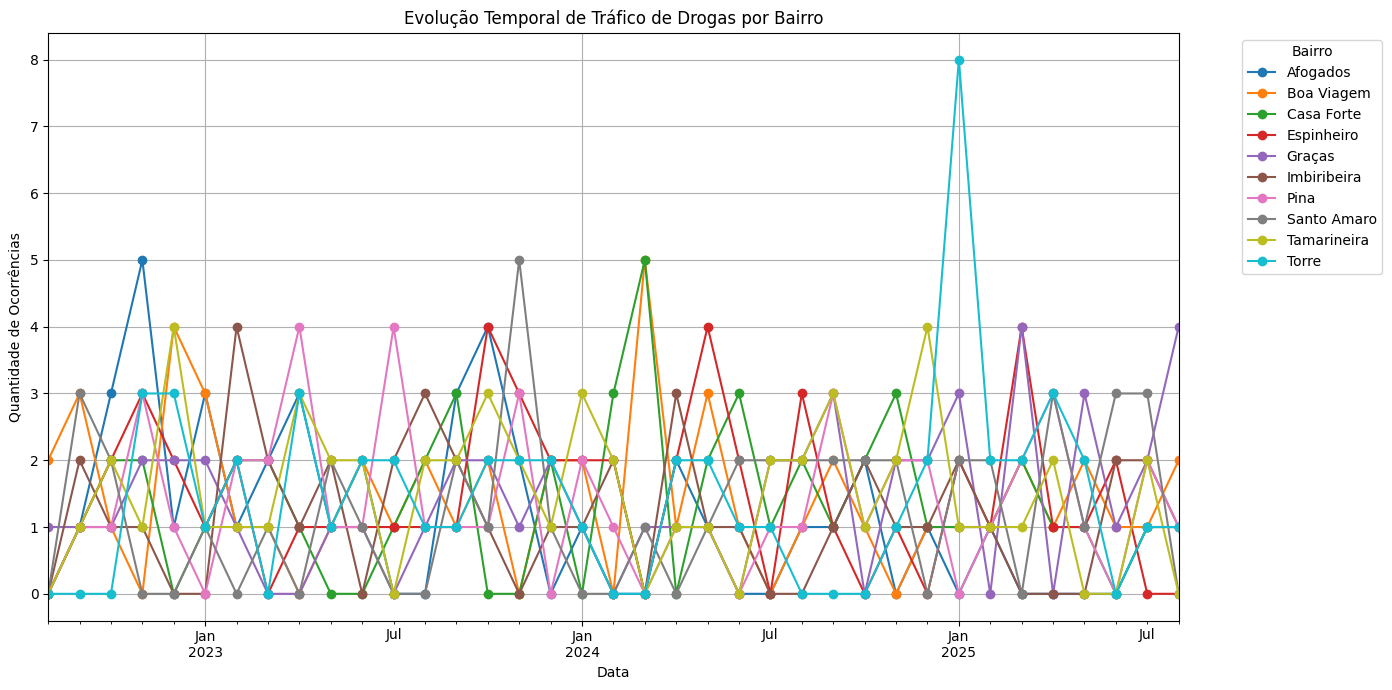

In [17]:

df_trafico = df[df['tipo_crime'] == 'Tráfico de Drogas']


df_trafico["data_ocorrencia"] = pd.to_datetime(df_trafico["data_ocorrencia"])


df_trafico["mes_ocorrencia"] = df_trafico["data_ocorrencia"].dt.to_period("M")


df_trafico_grouped = df_trafico.groupby(["mes_ocorrencia", "bairro"]).size().unstack(fill_value=0)

df_trafico_grouped.index = df_trafico_grouped.index.to_timestamp()

# Plotar gráfico
plt.figure(figsize=(14, 7))
df_trafico_grouped.plot(marker='o', figsize=(14, 7))

plt.title("Evolução Temporal de Tráfico de Drogas por Bairro")
plt.xlabel("Data")
plt.ylabel("Quantidade de Ocorrências")
plt.grid(True)
plt.legend(title="Bairro", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


# Insights da Evolução Temporal de Tráfico de Drogas por Bairro

## Picos de Ocorrências por Bairro:

Analisando a evolução temporal das ocorrências de **Tráfico de Drogas** por bairro, podemos identificar que os bairros com **maior número de picos** de tráfico de drogas são:

- **Torre**
- **Afogados**
- **Santo Amaro**
- **Casa Forte**

Esses bairros apresentaram picos recorrentes de **Tráfico de Drogas**, o que indica um padrão de maior atividade criminosa nesses locais. 

---

## Padrões Temporais dos Picos:

Ao observarmos os **picos de ocorrência** desses bairros, podemos perceber que eles tendem a ocorrer **sempre antes de janeiro ou em janeiro**. Esse padrão temporal pode indicar:

- **Fatores sazonais**: Como o início do ano, onde pode haver um aumento nas atividades criminosas devido a fatores como mudanças nas condições econômicas ou sociais.
- **Festas e férias**: O período próximo a janeiro pode envolver feriados, férias escolares ou eventos que aumentam a circulação de pessoas, o que pode ser explorado para entender o comportamento do tráfico nesse período específico.

---

## Conclusões e Sugestões para Investigação:

- **Investigar a influência do período de festas e férias** (como o fim de ano e início de janeiro) nesses bairros, pois a movimentação intensa de pessoas pode estar correlacionada ao aumento do tráfico de drogas.
- **Explorar possíveis fatores locais** que possam explicar o padrão recorrente de picos em bairros específicos, como a presença de pontos críticos de venda ou a falta de fiscalização intensa nesses períodos.

Esses insights podem ajudar a direcionar ações preventivas e melhorar a atuação das autoridades de segurança pública nessas áreas e períodos críticos.



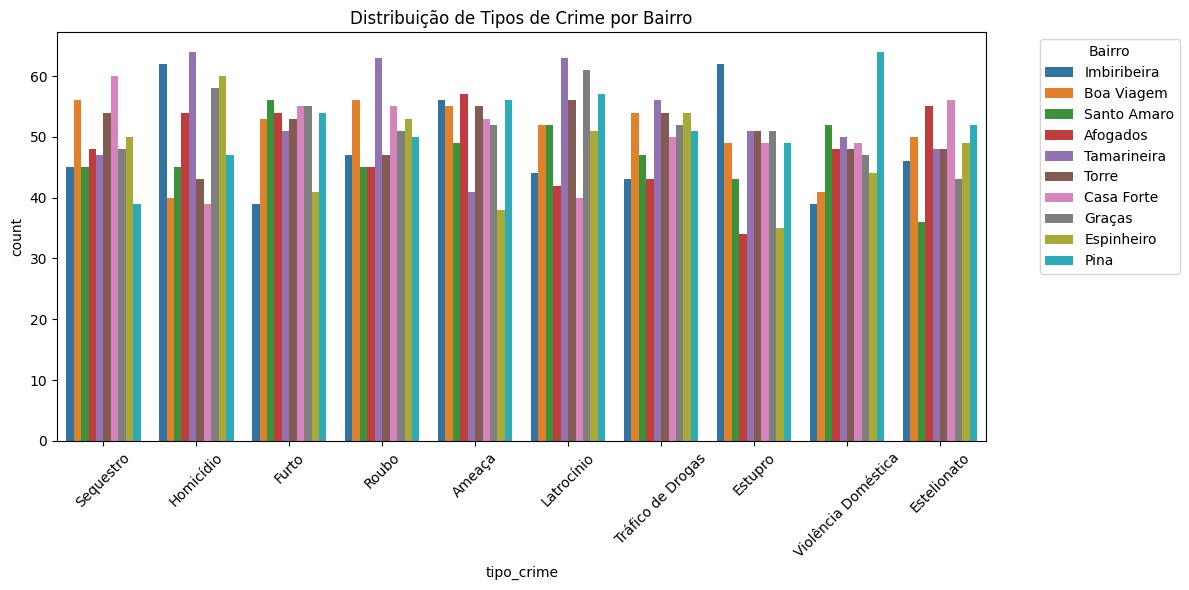

In [21]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x="tipo_crime", hue="bairro")
plt.title("Distribuição de Tipos de Crime por Bairro")
plt.xticks(rotation=45)
plt.legend(title="Bairro", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

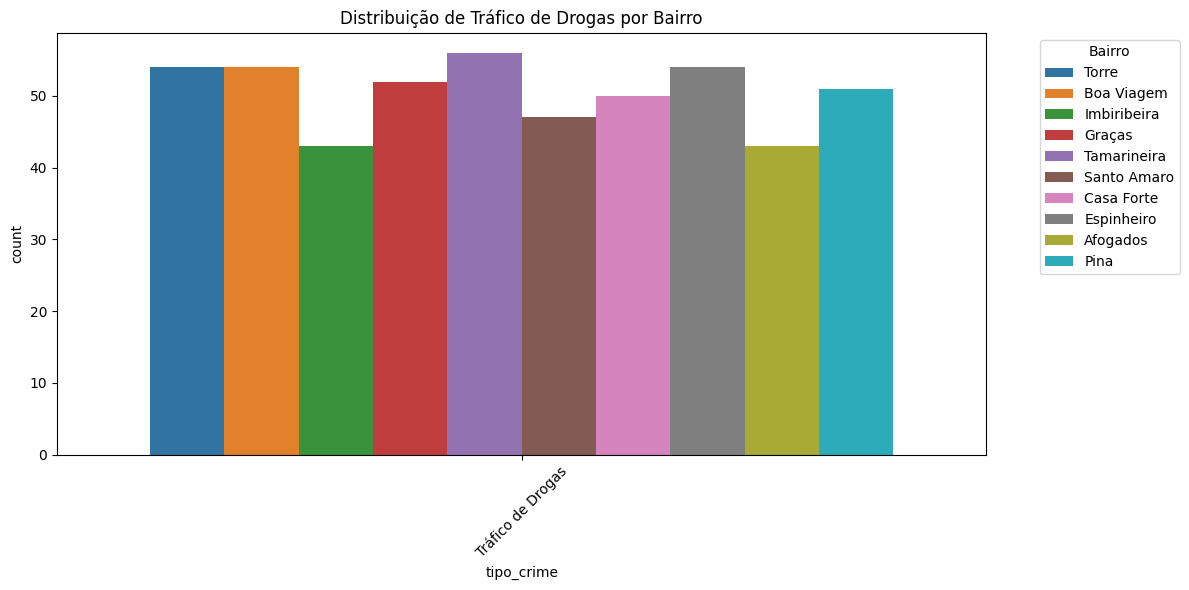

In [19]:
df_trafico = df[df['tipo_crime'] == 'Tráfico de Drogas']

plt.figure(figsize=(12,6))
sns.countplot(data=df_trafico, x="tipo_crime", hue="bairro")
plt.title("Distribuição de Tráfico de Drogas por Bairro")
plt.xticks(rotation=45)
plt.legend(title="Bairro", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



## Bairro com Maior Incidência de Tráfico de Drogas:

Após a análise dos dados de **Tráfico de Drogas**, podemos concluir que o bairro que **registrou o maior número de ocorrências** foi **Tamarineira**. 



Análise Bivariada

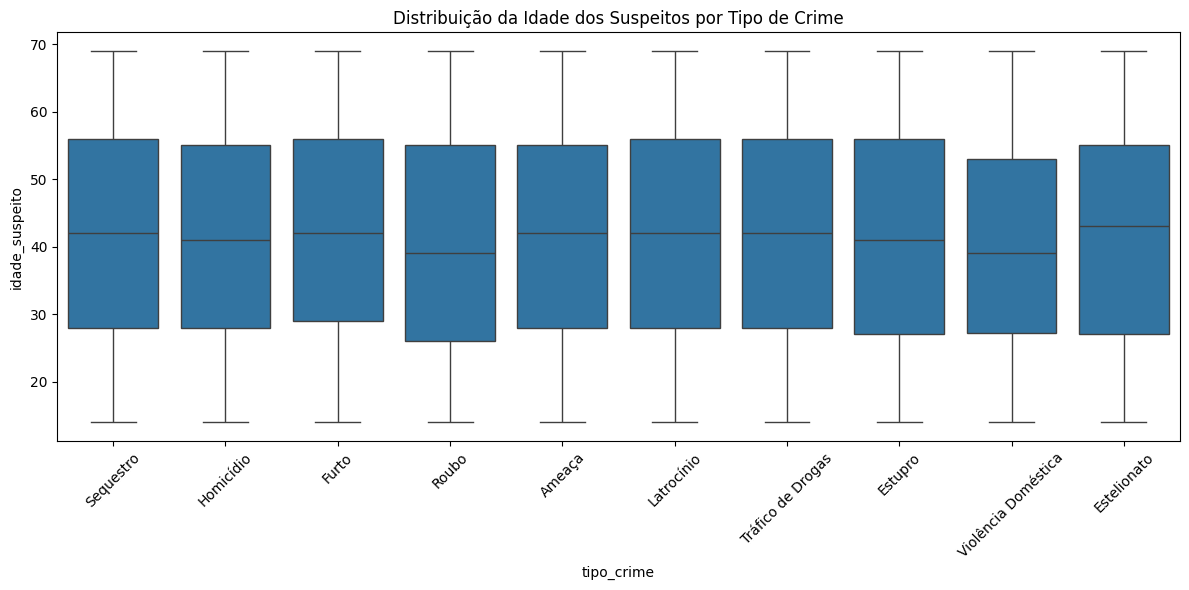

In [22]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x="tipo_crime", y="idade_suspeito")
plt.title("Distribuição da Idade dos Suspeitos por Tipo de Crime")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



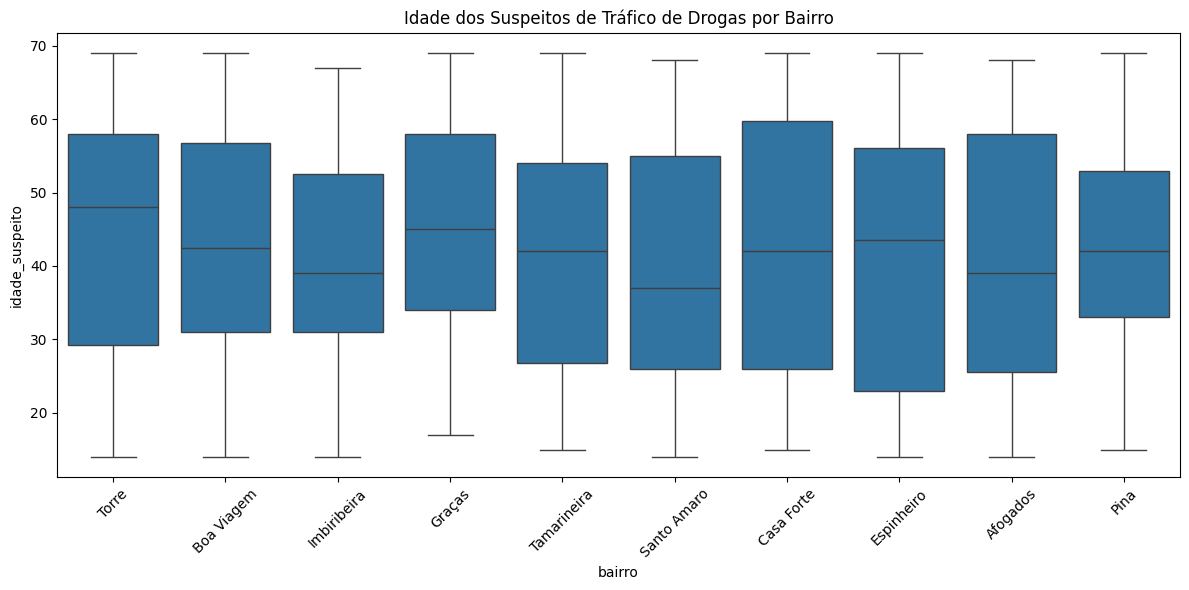

In [23]:
# Filtrar só Tráfico de Drogas
df_trafico = df[df["tipo_crime"] == "Tráfico de Drogas"]

plt.figure(figsize=(12,6))
sns.boxplot(data=df_trafico, x="bairro", y="idade_suspeito")
plt.title("Idade dos Suspeitos de Tráfico de Drogas por Bairro")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



## Idade Média dos Suspeitos de Tráfico de Drogas:

A análise da **idade dos suspeitos** de **Tráfico de Drogas** revela que a maioria dos envolvidos no crime possui **idade superior a 40 anos**, com um **pico significativo** entre **50 e 60 anos**.






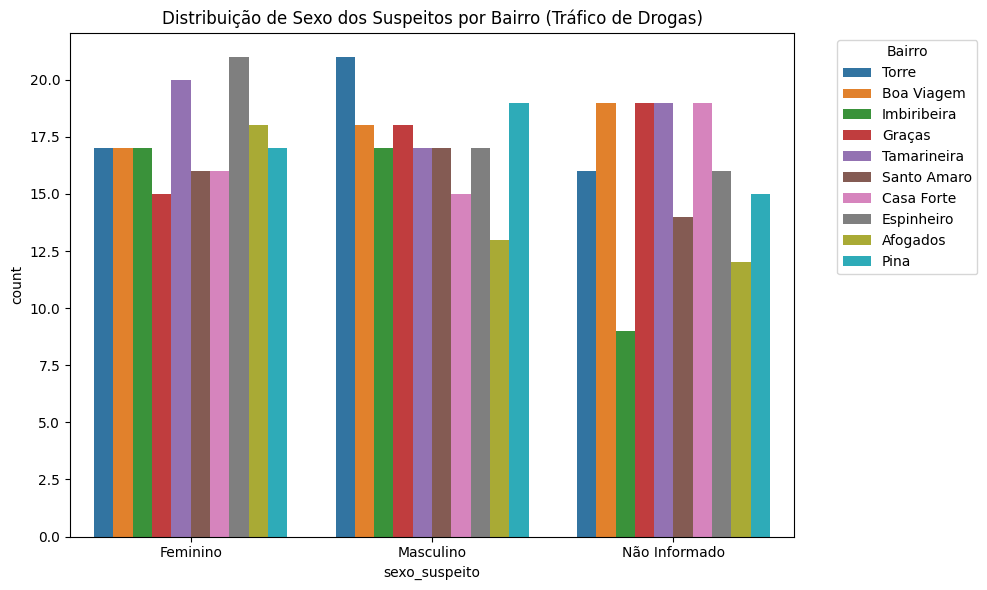

In [18]:
df_trafico = df[df['tipo_crime'] == 'Tráfico de Drogas']

plt.figure(figsize=(10,6))
sns.countplot(data=df_trafico, x="sexo_suspeito", hue="bairro")
plt.title("Distribuição de Sexo dos Suspeitos por Bairro (Tráfico de Drogas)")
plt.xticks(rotation=0)
plt.legend(title="Bairro", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Análise do Sexo dos Suspeitos de Tráfico de Drogas por Bairro

## Perfil de Sexo dos Suspeitos em Tamarineira e Torre

A análise do **sexo dos suspeitos** de **Tráfico de Drogas** revela padrões distintos entre os bairros de **Tamarineira** e **Torre**.

### **Tamarineira:**
Em **Tamarineira**, que é o bairro com o maior número de ocorrências de tráfico de drogas, o **sexo feminino** predomina entre os suspeitos. Esse padrão pode indicar que, neste bairro, mulheres estão mais envolvidas no tráfico, o que pode refletir um perfil específico de atuação no crime, possivelmente em funções como **distribuição** ou **controle de pontos de venda**.

### **Torre:**
Já em **Torre**, onde foi registrado um pico de atividades relacionadas ao tráfico de drogas, o **sexo masculino** é o mais predominante entre os suspeitos. Esse dado pode sugerir que, no contexto da Torre, o tráfico de drogas envolve principalmente homens, possivelmente com papéis mais diretamente ligados ao **controle de grandes operações de tráfico** ou **distribuição em larga escala**.

---

## Implicações e Possíveis Interpretações:

- **Tamarineira (Sexo Feminino)**: A maior participação feminina no tráfico de drogas pode indicar um **perfil diferente** de atuação no crime, onde mulheres podem estar mais envolvidas em **atividades de venda e distribuição**. Isso pode ser associado a **estratégias específicas** adotadas no bairro, como a utilização de mulheres para funções menos visíveis ou mais difíceis de serem detectadas.
  
- **Torre (Sexo Masculino)**: O fato de o **sexo masculino** predominar em **Torre**, especialmente durante um pico de tráfico, pode sugerir uma **maior masculinização das funções de liderança e organização** nas operações de tráfico no local. Homens podem estar mais envolvidos em **funções de comando e controle** dessas atividades criminosas.





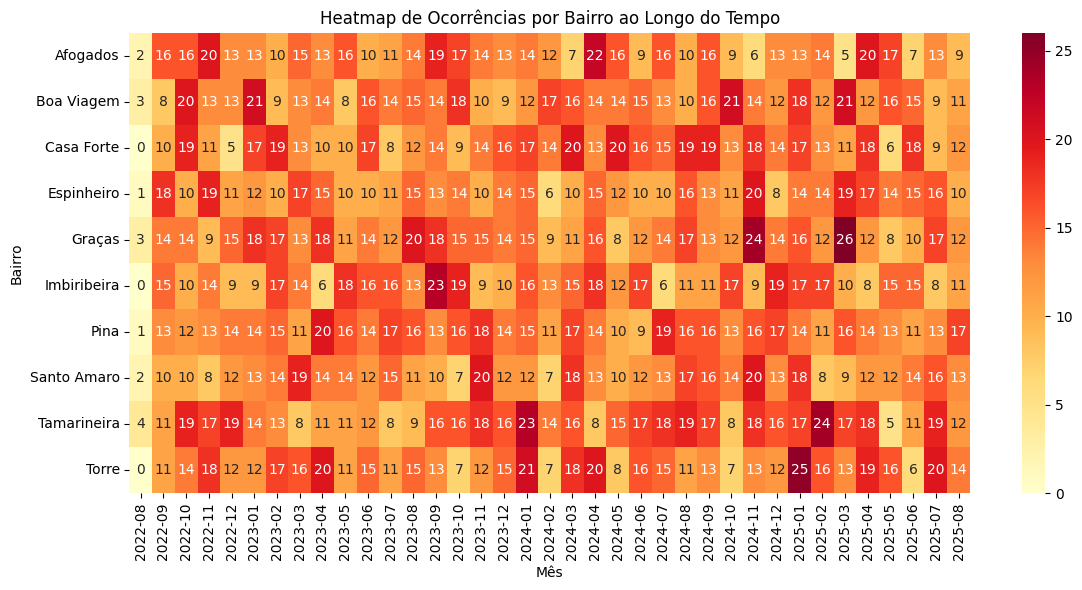

In [25]:
df["mes"] = df["data_ocorrencia"].dt.to_period("M")
df_bairro_mes = df.groupby(["mes", "bairro"]).size().unstack(fill_value=0)

# Heatmap
plt.figure(figsize=(12,6))
sns.heatmap(df_bairro_mes.T, cmap="YlOrRd", annot=True, fmt="d")
plt.title("Heatmap de Ocorrências por Bairro ao Longo do Tempo")
plt.xlabel("Mês")
plt.ylabel("Bairro")
plt.tight_layout()
plt.show()

Criação de novas colunas para tirar insights mais profundos 

In [ ]:

df["data_ocorrencia"] = pd.to_datetime(df["data_ocorrencia"])

# Criar novas colunas com partes da data
df["ano"] = df["data_ocorrencia"].dt.year
df["mes"] = df["data_ocorrencia"].dt.month
df["dia"] = df["data_ocorrencia"].dt.day
df["hora"] = df["data_ocorrencia"].dt.hour
df["minuto"] = df["data_ocorrencia"].dt.minute
df["segundo"] = df["data_ocorrencia"].dt.second

# Dia da semana (segunda=0, domingo=6)
df["dia_semana_num"] = df["data_ocorrencia"].dt.dayofweek





# Criar a coluna com o nome do dia da semana em português
df["dia_semana_nome"] = df["data_ocorrencia"].dt.day_name()

# Nome do dia da semana (segunda, terça, etc.)
df["dia_semana_nome"] = df["data_ocorrencia"].dt.day_name()


Distribuição de crimes por dia da semana

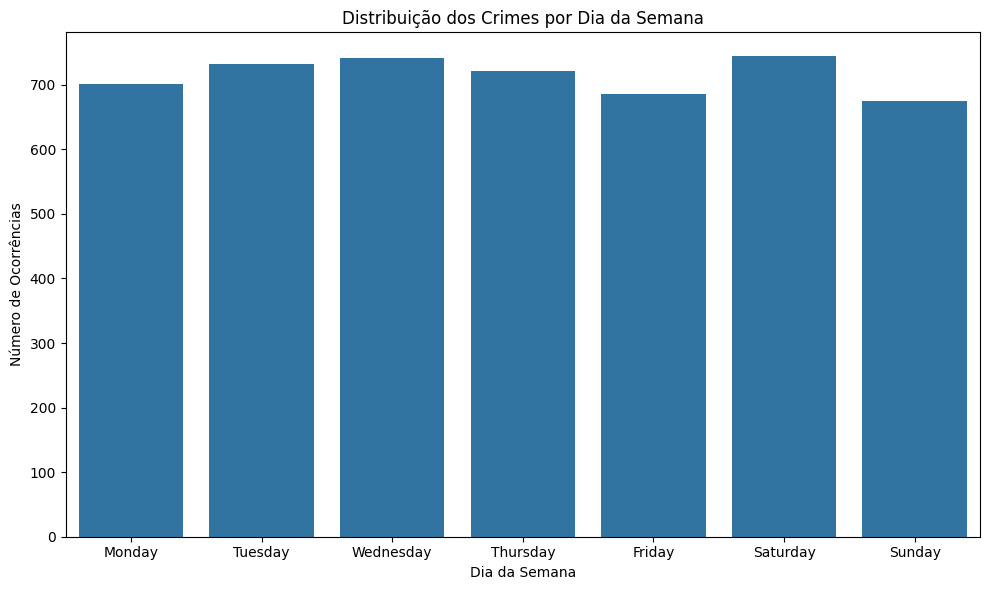

In [ ]:

# Plotar a contagem por nome do dia da semana
plt.figure(figsize=(10,6))
sns.countplot(data=df, x="dia_semana_nome", order=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
plt.title("Distribuição dos Crimes por Dia da Semana")
plt.xlabel("Dia da Semana")
plt.ylabel("Número de Ocorrências")
plt.tight_layout()
plt.show()


# Análise dos Dias com Maior Número de Ocorrências de Crimes

## Principais Descobertas

### **Dias com Maior Incidência de Crimes:**

A análise revelou que os **dias da semana** com o **maior número de ocorrências** são:

- **Quarta-feira**
- **Terça-feira**
- **Sábado**

Esses dias se destacam por apresentarem uma **concentração mais alta** de crimes em comparação com os outros dias da semana. Esse padrão pode indicar que certos fatores **sociais ou operacionais** contribuem para um aumento da criminalidade nesses dias específicos.


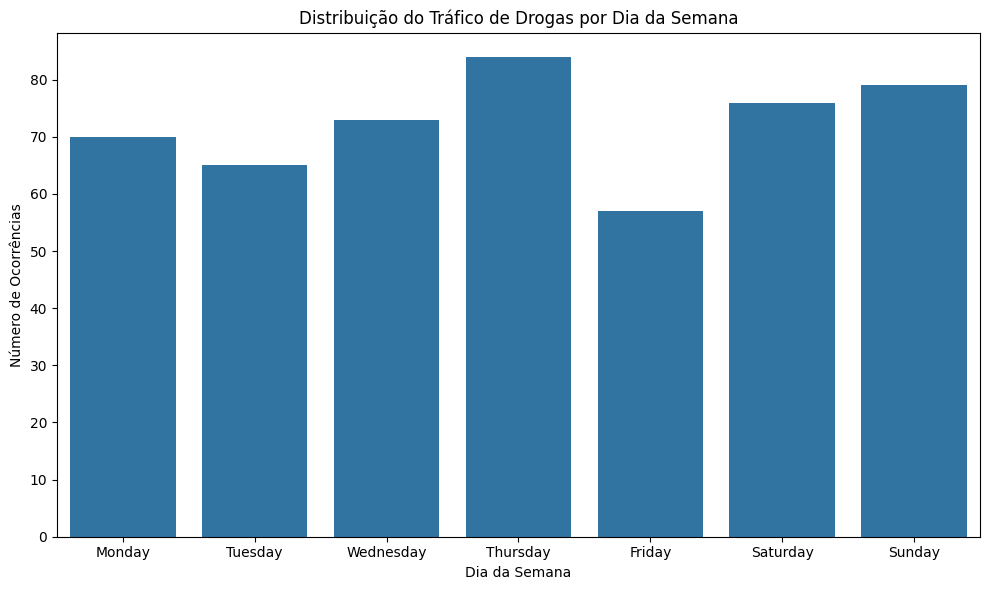

In [34]:

import matplotlib.pyplot as plt

# Filtrar somente o tipo de crime "Tráfico de Drogas"
df_trafico = df[df["tipo_crime"] == "Tráfico de Drogas"]

# Plotar a contagem por nome do dia da semana (para Tráfico de Drogas)
plt.figure(figsize=(10,6))
sns.countplot(data=df_trafico, x="dia_semana_nome", order=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
plt.title("Distribuição do Tráfico de Drogas por Dia da Semana")
plt.xlabel("Dia da Semana")
plt.ylabel("Número de Ocorrências")
plt.tight_layout()
plt.show()



## Padrão de Tráfico de Drogas na Quinta-feira

A análise da **distribuição do Tráfico de Drogas** ao longo da semana revela um padrão claro: **quinta-feira** é o dia com **maior número de ocorrências**.fico de drogas 

Outliers

In [20]:
from scipy.stats import zscore
import numpy as np

# Selecionar colunas numéricas relevantes
numericas = df.select_dtypes(include='number')

# Calcular Z-scores
z_scores = zscore(numericas)

# Identificar outliers com Z-score > 3 ou < -3
outliers = df[(np.abs(z_scores) > 3).any(axis=1)]

# Mostrar resultado
print(f"Outliers detectados: {outliers.shape[0]}")
display(outliers)


Outliers detectados: 0


,data_ocorrencia,bairro,tipo_crime,descricao_modus_operandi,arma_utilizada,quantidade_vitimas,quantidade_suspeitos,sexo_suspeito,idade_suspeito,orgao_responsavel


# Análise de Casos Extremos (Outliers)

## Principais Descobertas

### **Casos Extremes (Outliers):**
Após realizar a análise dos dados, podemos concluir que **não foram identificados nenhum outlier** nas variáveis analisadas. Isso significa que **todos os dados estão dentro do padrão esperado** e não há **valores atípicos** que distorçam ou comprometam a qualidade da análise.

# Recomendações para Pré-Processamento

Com base na análise exploratória realizada, as seguintes etapas são essenciais para preparar os dados para a modelagem de previsão de crimes:

## 1. Validação de Datas

- **Transformar a coluna de data de ocorrência** em três colunas separadas para extrair as seguintes informações:
  - **Ano**: Para capturar tendências temporais anuais.
  - **Mês**: Para observar variações sazonais e mensais.
  - **Dia**: Para análise de eventos diários ou padrões semanais.
  - **Horário**: Para analisar a distribuição dos crimes ao longo do dia e identificar horários de pico.

---

## 2. Encoding de Variáveis Categóricas

- **One-Hot Encoding**: Para variáveis categóricas com poucas categorias (ex: **sexo**, **status_investigacao**), é recomendada a aplicação de **one-hot encoding**, o que transformará essas variáveis em colunas binárias, facilitando a modelagem.

---

## 3. Engenharia de Features Temporais

### **Extração de Componentes Temporais**
- **Ano**, **Mês**, **Dia da Semana** e **Hora**: Essas features são cruciais para capturar padrões temporais e comportamentos sazonais.

### **Sazonalidade**
- **Trimestre**: Utilizar trimestres como uma feature pode ajudar a capturar variações sazonais de longo prazo.
- **Estação do Ano**: Identificar as estações do ano pode ser útil para observar a correlação com a ocorrência de crimes.

### **Features Cíclicas**
- **Sin/Cos**: Para capturar a ciclicidade dos dados temporais, como **dia da semana** e **hora**, pode-se aplicar transformações **sin** e **cos** nas variáveis para representar a natureza cíclica do tempo (por exemplo, domingo e segunda-feira são próximos em termos de padrão temporal).

### **Lag Features**
- **Crimes em Períodos Anteriores**: Criar variáveis de **lag** (ex: crimes ocorrendo nos meses ou semanas anteriores) pode ser útil para capturar tendências temporais e a **influência do passado** na previsão dos próximos eventos criminais.

---

## 4. Balanceamento de Classes

- **Verificar desbalanceamento de classes**: Analisar a distribuição da variável target (número de crimes) e verificar se há desbalanceamento, especialmente em relação a bairros ou tipos de crime.
  - Caso haja desbalanceamento, aplicar técnicas como **undersampling** ou **oversampling** para garantir que o modelo seja capaz de generalizar de forma eficiente.

---

## 5. Seleção e Criação da Variável Target

- **Definir o objetivo da modelagem**: A variável target pode ser a previsão do **número de crimes** que ocorrerão em um **determinado bairro** no **próximo mês** ou em uma janela de tempo definida (ex: semana, dia).
  
- **Agregação temporal**: Definir a **janela de predição** (mês, semana, dia) de forma clara, garantindo que a **variável target** seja coerente com o objetivo do modelo.

---

## 6. Validação e Splits

### **Divisão Temporal**:
- A divisão entre os conjuntos de **train** e **test** deve respeitar a **ordem cronológica** dos dados para evitar **vazamento de informação** e garantir que o modelo seja avaliado em dados futuros.

### **Validação Cruzada**:
- Utilizar **time series split** na validação cruzada, respeitando a **temporalidade** dos dados, para simular a situação real de previsão e evitar problemas com a estrutura temporal dos dados.

### **Estratificação**:
- Manter as **proporções de classes** e **bairros** durante o **split** para garantir que o modelo tenha uma representação balanceada de todas as variáveis importantes, principalmente na variável target (crimes por bairro).

---

Essas etapas ajudarão a **preparar os dados de forma eficiente** para a construção de modelos preditivos, garantindo que as **tendências temporais** e os **padrões sazonais** sejam corretamente capturados.
